In [112]:
import numpy as np
from scipy import linalg as la
import matplotlib.pyplot as plt
import math
import cmath

In [32]:
""" Problem 1 """
def LS(A,b):
    Q,R = la.qr(A, mode="economic")
    y = Q.T@b
    xhat = la.solve_triangular(R,y)
    return xhat

A = np.random.random((6,4))
b = np.ones(6)
xhat = LS(A,b)
xhat_prime = la.lstsq(A,b)[0]
print(xhat)
print(xhat_prime)

[ 0.34704184  1.03606181 -0.21448919  0.92459914]
[ 0.34704184  1.03606181 -0.21448919  0.92459914]


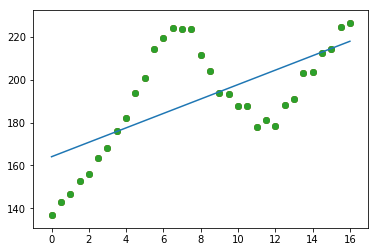

In [31]:
""" Problem 2 """
housing = np.load("/Users/Deehrlich/Desktop/BootCamp2017/Computation/Wk3_Decomp/housing.npy")

x = np.vstack(housing[:,0])
ones = np.ones(len(a))
A = np.column_stack((x,ones))
b= np.vstack(housing[:,1])

xhat = LS(A,b)
y = x*xhat[0] +xhat[1]

plt.scatter(x, b)
plt.plot(x,y)
plt.show()

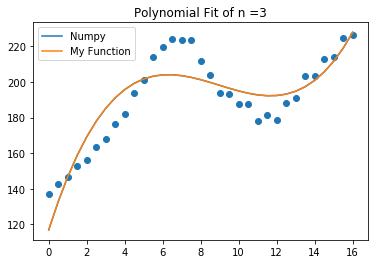

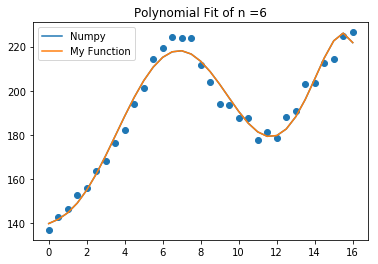

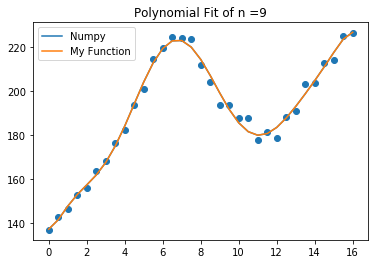

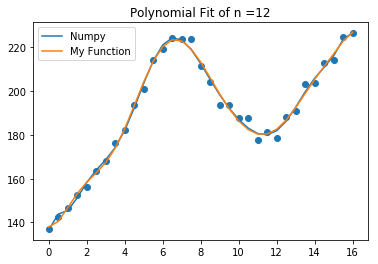

In [55]:
""" Problem 3 """

def polyfit(data, n):
    x = np.vstack(housing[:,0])
    b= np.vstack(housing[:,1])
    A = np.vander(data[:,0], n+1)
    xhat = la.lstsq(A,b)[0]
    y = np.dot(A,xhat)
    
    xhatprime  = np.polyfit(housing[:,0],b,n)
    yprime = np.dot(A,xhatprime)
    
    plt.scatter(x, b)
    plt.plot(x,yprime, label = "Numpy")
    plt.plot(x,y, label = "My Function")
    plt.title("Polynomial Fit of n =" + str(n))
    plt.legend()
    plt.show()
    
polyfit(housing, 3)
polyfit(housing, 6)
polyfit(housing, 9)
polyfit(housing, 12)

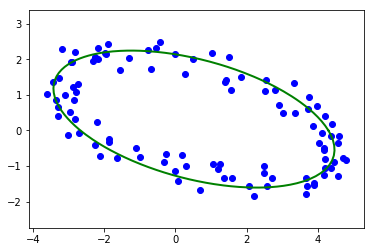

In [73]:
""" Problem 4 """

def plot_ellipse(a, b, c, d, e):
    """Plot an ellipse of the form ax^2 + bx + cxy + dy + ey^2 = 1."""
    theta = np.linspace(0, 2*np.pi, 200)
    cos_t, sin_t = np.cos(theta), np.sin(theta)
    A = a*(cos_t**2) + c*cos_t*sin_t + e*(sin_t**2)
    B = b*cos_t + d*sin_t
    r = (-B + np.sqrt(B**2 + 4*A))/(2*A)
    plt.plot(r*cos_t, r*sin_t, lw=2, color="g")
    plt.gca().set_aspect("equal", "datalim")
    
def ls_ellipse(x,y):
    
    x2 = xk**2
    xy = x*y
    y2 = y**2
    A = np.column_stack((x2,x,xy,y,y2))
    b = np.ones(len(x))
    xhat = la.lstsq(A,b)[0]
    plot_ellipse(xhat[0], xhat[1], xhat[2], xhat[3], xhat[4])
    plt.scatter(xk,yk, color="b")
    plt.show()

    
x, y = np.load("/Users/Deehrlich/Desktop/BootCamp2017/Computation/Wk3_Decomp/ellipse.npy").T
ls_ellipse(x, y)

In [93]:
""" Problem 5 """

def eig(A,N,tol):
    m,n = A.shape
    xnew = np.random.rand(n,1)
    xnew = xnew/la.norm(xnew)
    xold = np.ones(n)
    error = 100
 
    step = 0
    while error > tol and step < N:
            xnew = A@xold
            xnew = xnew/la.norm(xnew)
            error = la.norm(xnew-xold)
            xold = xnew
            step +=1
    
    return xnew.T@A@xnew, xnew

A = np.random.random((10,10))
# Compute the eigenvalues and eigenvectors of A via SciPy.
eigs2, vecs2 = la.eig(A)
# Get the dominant eigenvalue and eigenvector of A.
# The eigenvector of the kth eigenvalue is the kth column of 'vecs'. >>> loc = np.argmax(eigs)
loc2 = np.argmax(eigs2)
lamb2, x2 = eigs2[loc2], vecs2[:,loc2]
# Verify that Ax = lambda x.
lamb1, x1 = eig(A, N = 100, tol = 1e-5)
print(np.allclose(A.dot(x2), lamb2*x2))
print(np.allclose(A.dot(x1), lamb1*x1))

True
True


In [133]:
""" Problem 6 """

def hes_QR(A,N,tol):
    m,n = A.shape
    S = la.hessenberg(A, calc_q=True)[0]
    for k in range(N):
        Q,R = la.qr(S)
        S = R@Q
    eigs = []
    i = 0
    while i < n:
        if i == n-1 or abs(S[i+1,i]) < tol:
            eigs.append(S[i,i])
        else:
            trace = S[i,i]+S[i+1,i+1]
            det = S[i,i]*S[i+1,i+1] - S[i,i+1]*S[i+1,i]
            eig1 = 0.5*(trace + cmath.sqrt(trace**2 - 4*det))
            eig2 = 0.5*(trace - cmath.sqrt(trace**2 - 4*det))
            eigs.append(eig1)
            eigs.append(eig2)
            i += 1
        i+=1
    return eigs

A = np.random.random((10,10))
eigs1 = hes_QR(A, N = 100, tol = 1e-5)
eigs2, vecs2 = la.eig(A)
print(np.sort(eigs1))
print(np.sort(eigs2))


[-0.95634003+0.j         -0.52576169+0.j         -0.50414460+0.j
 -0.47016301+0.j          0.05438654-0.52003534j  0.05438654+0.52003534j
  0.42193375+0.j          0.59451799-0.36426556j  0.59451799+0.36426556j
  5.20595509+0.j        ]
[-0.95571925+0.j         -0.50766930+0.j         -0.48746419-0.76748665j
 -0.48746419+0.76748665j  0.04534034-0.51591936j  0.04534034+0.51591936j
  0.42193375+0.j          0.59451799-0.36426556j  0.59451799+0.36426556j
  5.20595509+0.j        ]
